In [ ]:
import pandas as pd
from pathlib import Path
import re

data_dir = Path("data/clean_csv")

all_rows = []

for file in sorted(data_dir.glob("*.csv")):
    match = re.match(r"(\d+)-(\d+)\.csv", file.name)
    if not match:
        continue
    year, month = match.groups()
    year = int("20" + year) if len(year) == 2 else int(year)
    month = int(month)
    
    df = pd.read_csv(file)
    
    df["year"] = year
    df["month"] = month
    
    all_rows.append(df)

data = pd.concat(all_rows, ignore_index=True)

data = data.sort_values(["year", "month", "category"]).reset_index(drop=True)

print("Combined shape:", data.shape)
data.head()


✅ Combined shape: (189, 12)


,category,supplier_sum,sold_qty,sold_cost,sold_sum,return_qty,return_cost,return_sum,revenue,profit,year,month
0,Ігри,1924.08,60,5779.21,10146.14,0,0.0,0.0,10146.14,4366.93,2023,10
1,Інші,0.00,6,840.00,1425.00,0,0.0,0.0,1425.00,585.00,2023,10
2,Канцтовари,0.00,56,1956.43,3609.90,0,0.0,0.0,3609.90,1653.47,2023,10
3,Книга,0.00,353,31299.58,51047.21,1,84.0,140.0,50907.21,19691.63,2023,10
4,Конструктори,5952.32,25,6600.83,11414.45,0,0.0,0.0,11414.45,4813.62,2023,10


In [ ]:
# Exporting new combined CSV
data.to_csv("data/all_months_combined.csv", index=False, encoding="utf-8-sig")

<Axes: title={'center': 'Total Profit Over Time'}, xlabel='date'>

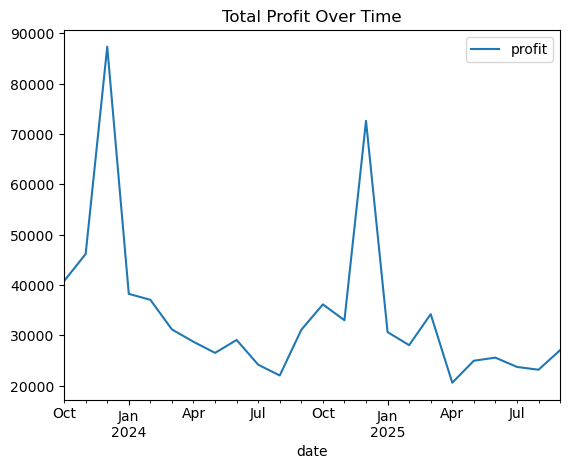

In [9]:
monthly_profit = (
    data.groupby(["year","month"])["profit"]
    .sum()
    .reset_index()
)
monthly_profit["date"] = pd.to_datetime(monthly_profit[["year","month"]].assign(day=1))
monthly_profit.plot(x="date", y="profit", title="Total Profit Over Time")

<Axes: title={'center': 'Profit per Category Over Time'}, xlabel='year,month'>

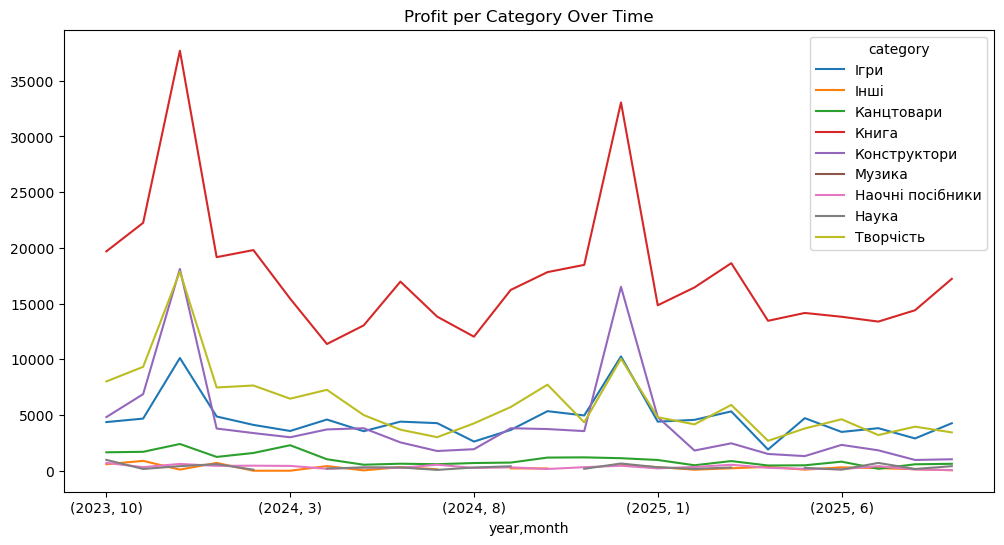

In [10]:
pivot_profit = data.pivot_table(
    index=["year","month"], columns="category", values="profit", aggfunc="sum"
)
pivot_profit.plot(figsize=(12,6), title="Profit per Category Over Time")

In [11]:
data.groupby(["year","category"])["profit"].sum().unstack().T

year,2023,2024,2025
category,,,
Ігри,19163.81,56204.85,35376.10
Інші,1570.00,2527.61,1789.12
Канцтовари,5750.80,12827.62,5463.29
Книга,79639.57,207256.77,136390.50
Конструктори,29796.49,51552.48,18046.35
Музика,NaN,66.68,NaN
Наочні посібники,1633.88,4047.54,2231.35
Наука,1540.72,3049.76,2390.86
Творчість,35215.34,72630.13,36565.74
